<a href="https://colab.research.google.com/github/IsagiYoichi640/Country-Data/blob/main/Country_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import files
file=files.upload()

Saving Countries Data.csv to Countries Data (2).csv


# Population growth from 1952 to 2007
* **Goal:** To find out the top 10 countries with the biggest population growth for the year 1952-2007.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
countries_df=pd.read_csv("/content/Countries Data.csv")

In [ ]:
countries_df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [ ]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


# Findings
* The Dataset has 1704 entires with 6 columns.
* It has 4 numerical columns(2 int, 2 float) and 2 descriptive columns.

In [ ]:
countries_df.isnull().sum()

,0
country,0
year,0
population,0
continent,0
life_exp,0
gdp_cap,0


## Findings
* No null values in the dataset.

In [ ]:
#print the rows where the year is 1952
countries_df[countries_df['year']==1952]

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
12,Albania,1952,1282697,Europe,55.230,1601.056136
24,Algeria,1952,9279525,Africa,43.077,2449.008185
36,Angola,1952,4232095,Africa,30.015,3520.610273
48,Argentina,1952,17876956,Americas,62.485,5911.315053
...,...,...,...,...,...,...
1644,Vietnam,1952,26246839,Asia,40.412,605.066492
1656,West Bank and Gaza,1952,1030585,Asia,43.160,1515.592329
1668,"Yemen, Rep.",1952,4963829,Asia,32.548,781.717576
1680,Zambia,1952,2672000,Africa,42.038,1147.388831


In [ ]:
countries_df[countries_df['year']==2007]

,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.580338
23,Albania,2007,3600523,Europe,76.423,5937.029526
35,Algeria,2007,33333216,Africa,72.301,6223.367465
47,Angola,2007,12420476,Africa,42.731,4797.231267
59,Argentina,2007,40301927,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332,Asia,73.422,3025.349798
1679,"Yemen, Rep.",2007,22211743,Asia,62.698,2280.769906
1691,Zambia,2007,11746035,Africa,42.384,1271.211593


In [ ]:
merged_df=pd.merge(countries_df[countries_df['year']==1952], countries_df[countries_df['year']==2007],on='country')

In [ ]:
merged_df.head()

,country,year_x,population_x,continent_x,life_exp_x,gdp_cap_x,year_y,population_y,continent_y,life_exp_y,gdp_cap_y
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,2007,31889923,Asia,43.828,974.580338
1,Albania,1952,1282697,Europe,55.230,1601.056136,2007,3600523,Europe,76.423,5937.029526
2,Algeria,1952,9279525,Africa,43.077,2449.008185,2007,33333216,Africa,72.301,6223.367465
3,Angola,1952,4232095,Africa,30.015,3520.610273,2007,12420476,Africa,42.731,4797.231267
4,Argentina,1952,17876956,Americas,62.485,5911.315053,2007,40301927,Americas,75.320,12779.379640


In [ ]:
merged_df.isnull().sum()

,0
country,0
year_x,0
population_x,0
continent_x,0
life_exp_x,0
gdp_cap_x,0
year_y,0
population_y,0
continent_y,0
life_exp_y,0


In [ ]:
merged_df.drop(['year_x', 'year_y'],axis=1,inplace=True)

In [ ]:
#diff in population from 1952 to 2007
merged_df['population_diff']=merged_df['population_y']-merged_df['population_x']

In [ ]:
merged_df.head()

,country,population_x,continent_x,life_exp_x,gdp_cap_x,population_y,continent_y,life_exp_y,gdp_cap_y,population_diff
0,Afghanistan,8425333,Asia,28.801,779.445314,31889923,Asia,43.828,974.580338,23464590
1,Albania,1282697,Europe,55.230,1601.056136,3600523,Europe,76.423,5937.029526,2317826
2,Algeria,9279525,Africa,43.077,2449.008185,33333216,Africa,72.301,6223.367465,24053691
3,Angola,4232095,Africa,30.015,3520.610273,12420476,Africa,42.731,4797.231267,8188381
4,Argentina,17876956,Americas,62.485,5911.315053,40301927,Americas,75.320,12779.379640,22424971


In [54]:
#sort the population diff column to get the top 10 countries witht he higghest diff
merged_sorted=merged_df.sort_values(by='population_diff',ascending=False).head(10)

In [55]:
#reset the index
merged_sorted.reset_index()

,index,country,population_x,continent_x,life_exp_x,gdp_cap_x,population_y,continent_y,life_exp_y,gdp_cap_y,population_diff
0,24,China,556263527,Asia,44.000,400.448611,1318683096,Asia,72.961,4959.114854,762419569
1,58,India,372000000,Asia,37.373,546.565749,1110396331,Asia,64.698,2452.210407,738396331
2,134,United States,157553000,Americas,68.440,13990.482080,301139947,Americas,78.242,42951.653090,143586947
3,59,Indonesia,82052000,Asia,37.468,749.681655,223547000,Asia,70.650,3540.651564,141495000
4,14,Brazil,56602560,Americas,50.917,2108.944355,190010647,Americas,72.390,9065.800825,133408087
5,97,Pakistan,41346560,Asia,43.436,684.597144,169270617,Asia,65.483,2605.947580,127924057
6,8,Bangladesh,46886859,Asia,37.484,684.244172,150448339,Asia,64.062,1391.253792,103561480
7,94,Nigeria,33119096,Africa,36.324,1077.281856,135031164,Africa,46.859,2013.977305,101912068
8,82,Mexico,30144317,Americas,50.789,3478.125529,108700891,Americas,76.195,11977.574960,78556574
9,101,Philippines,22438691,Asia,47.752,1272.880995,91077287,Asia,71.688,3190.481016,68638596


In [56]:
merged_sorted.head(10)

,country,population_x,continent_x,life_exp_x,gdp_cap_x,population_y,continent_y,life_exp_y,gdp_cap_y,population_diff
24,China,556263527,Asia,44.000,400.448611,1318683096,Asia,72.961,4959.114854,762419569
58,India,372000000,Asia,37.373,546.565749,1110396331,Asia,64.698,2452.210407,738396331
134,United States,157553000,Americas,68.440,13990.482080,301139947,Americas,78.242,42951.653090,143586947
59,Indonesia,82052000,Asia,37.468,749.681655,223547000,Asia,70.650,3540.651564,141495000
14,Brazil,56602560,Americas,50.917,2108.944355,190010647,Americas,72.390,9065.800825,133408087
97,Pakistan,41346560,Asia,43.436,684.597144,169270617,Asia,65.483,2605.947580,127924057
8,Bangladesh,46886859,Asia,37.484,684.244172,150448339,Asia,64.062,1391.253792,103561480
94,Nigeria,33119096,Africa,36.324,1077.281856,135031164,Africa,46.859,2013.977305,101912068
82,Mexico,30144317,Americas,50.789,3478.125529,108700891,Americas,76.195,11977.574960,78556574
101,Philippines,22438691,Asia,47.752,1272.880995,91077287,Asia,71.688,3190.481016,68638596


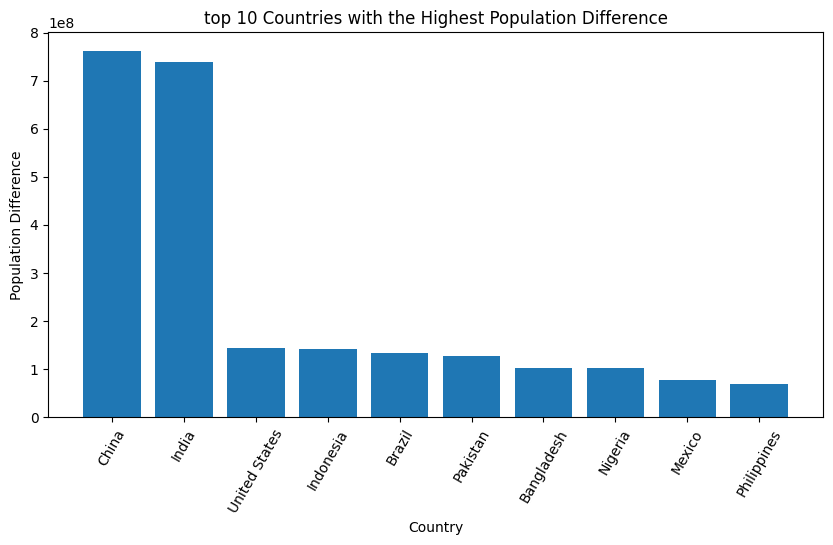

In [59]:
#plot bar chart with top 10 countries with the highest population diff
plt.figure(figsize=(10,5))
plt.bar(merged_sorted['country'][:10],merged_sorted['population_diff'][:10])
plt.xticks(rotation=60)
plt.xlabel("Country")
plt.ylabel("Population Difference")
plt.title("top 10 Countries with the Highest Population Difference")
plt.show()